In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
loan_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
loan_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
len(loan_train)

614

In [11]:
len(loan_test)

367

In [12]:
loan_train.isna().values.any()

True

In [13]:
loan_test.isna().values.any()

True

In [14]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

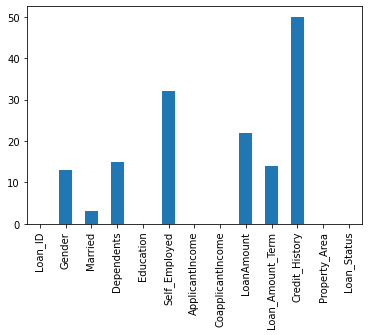

In [15]:
loan_train.isna().sum().plot(kind="bar")
plt.show()

In [16]:
loan_train['Credit_History'].fillna(method='ffill',inplace=True)
loan_train['Credit_History'].isna().values.any()

False

In [17]:
median_LAT = loan_train['Loan_Amount_Term'].median()
median_LAT

360.0

In [18]:
loan_train['Loan_Amount_Term'].fillna((median_LAT),inplace=True)
loan_train['Loan_Amount_Term'].isna().values.any()

False

In [19]:
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
loan_train['Self_Employed'].fillna('No',inplace=True)
loan_train['Self_Employed'].isna().values.any()

False

In [21]:
loan_train['Dependents'].fillna(0,inplace=True)
loan_train['Dependents'].isna().values.any()

False

In [22]:
loan_train['Married'].mode()

0    Yes
dtype: object

In [23]:
loan_train['Married'].fillna('Yes',inplace=True)
loan_train['Married'].isna().values.any()

False

In [24]:
loan_train['Gender'].mode()

0    Male
dtype: object

In [25]:
loan_train['Gender'].fillna('Male',inplace=True)
loan_train['Gender'].isna().values.any()

False

In [26]:
median_LA = loan_train['LoanAmount'].median()
median_LA

128.0

In [27]:
loan_train['LoanAmount'].fillna((median_LA),inplace=True)
loan_train['LoanAmount'].isna().values.any()

False

In [28]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [30]:
loan_test['Credit_History'].fillna(method='ffill',inplace=True)
loan_test['Credit_History'].isna().values.any()

median_LAT = loan_test['Loan_Amount_Term'].median()
loan_test['Loan_Amount_Term'].fillna((median_LAT),inplace=True)
loan_test['Loan_Amount_Term'].isna().values.any()

median_LA = loan_test['LoanAmount'].median()
loan_test['LoanAmount'].fillna((median_LA),inplace=True)
loan_test['LoanAmount'].isna().values.any()

loan_test['Self_Employed'].fillna('No',inplace=True)
loan_test['Self_Employed'].isna().values.any()

loan_test['Dependents'].fillna(0,inplace=True)
loan_test['Dependents'].isna().values.any()

loan_test['Gender'].fillna('Male',inplace=True)
loan_test['Gender'].isna().values.any()

False

In [31]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
loan_test.duplicated().values.any()

False

In [33]:
loan_train.duplicated().values.any()

False

In [34]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


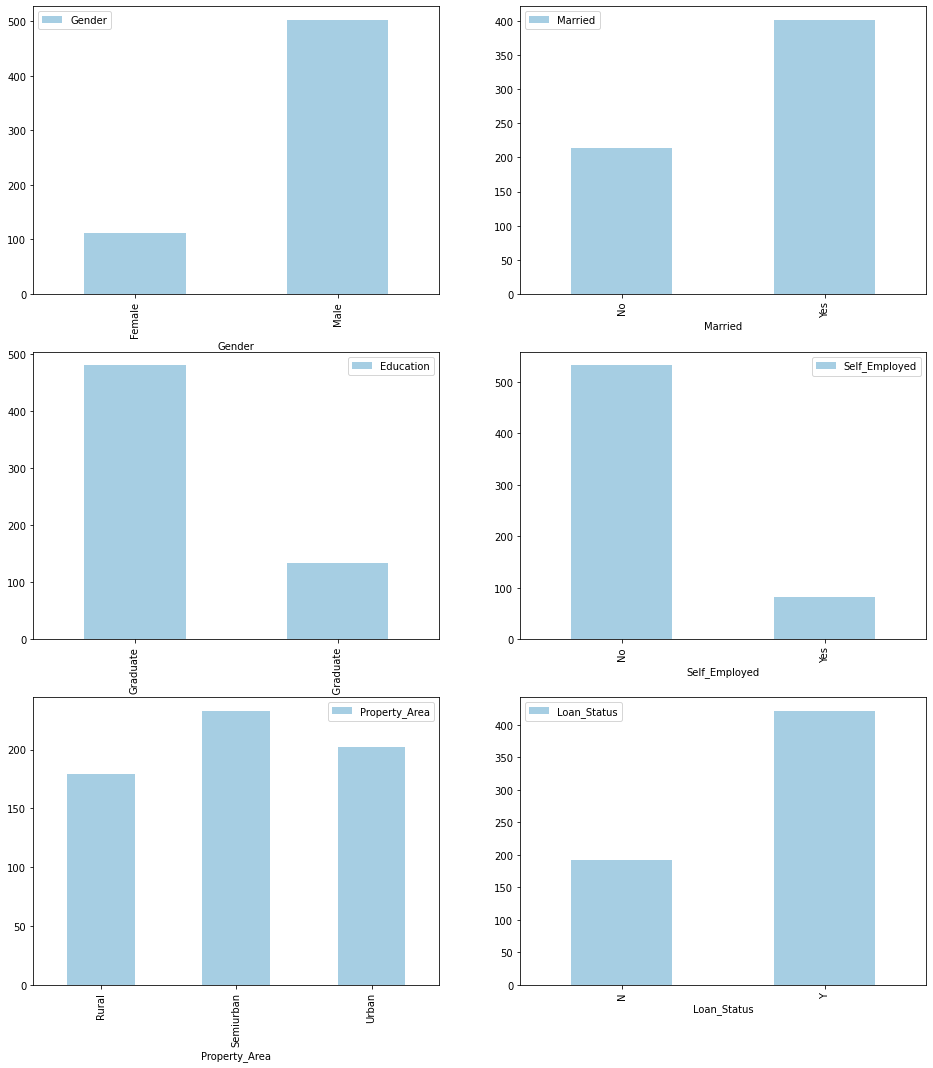

In [36]:
fig,ax = plt.subplots(3,2,figsize=(16,18))

loan_train.groupby(['Gender'])[['Gender']].count().plot.bar(color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[0,0])
loan_train.groupby(['Married'])[['Married']].count().plot.bar(color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[0,1])
loan_train.groupby(['Education'])[['Education']].count().plot.bar(color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[1,0])
loan_train.groupby(['Self_Employed'])[['Self_Employed']].count().plot.bar(color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[1,1])
loan_train.groupby(['Property_Area'])[['Property_Area']].count().plot.bar(color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,0])
loan_train.groupby(['Loan_Status'])[['Loan_Status']].count().plot.bar(color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,1])

plt.show()

In [38]:
categorical_columns = loan_train.select_dtypes('object').columns.to_list()

In [39]:
categorical_columns[1:]

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

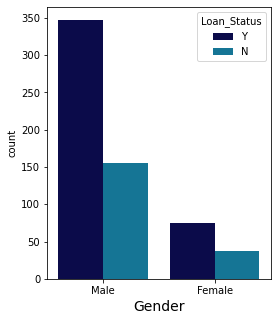

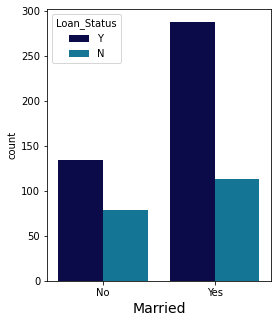

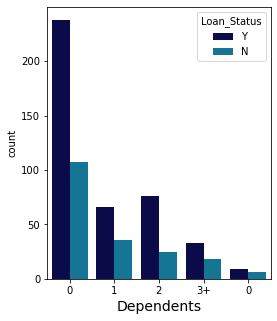

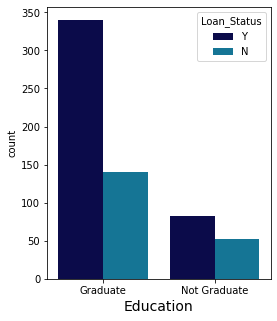

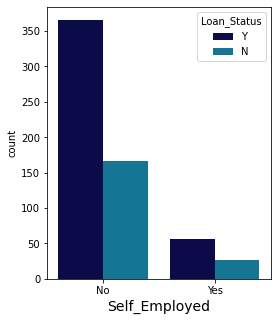

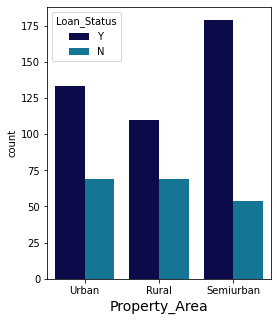

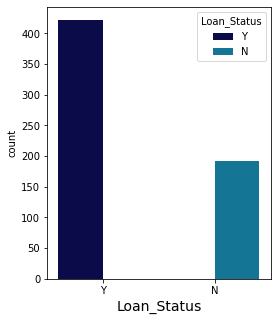

In [45]:
for i in categorical_columns[1:]:
    plt.figure(figsize=(4,5))
    sns.countplot(x=i,hue='Loan_Status',data=loan_train,palette='ocean')
    plt.xlabel(i,fontsize=14)

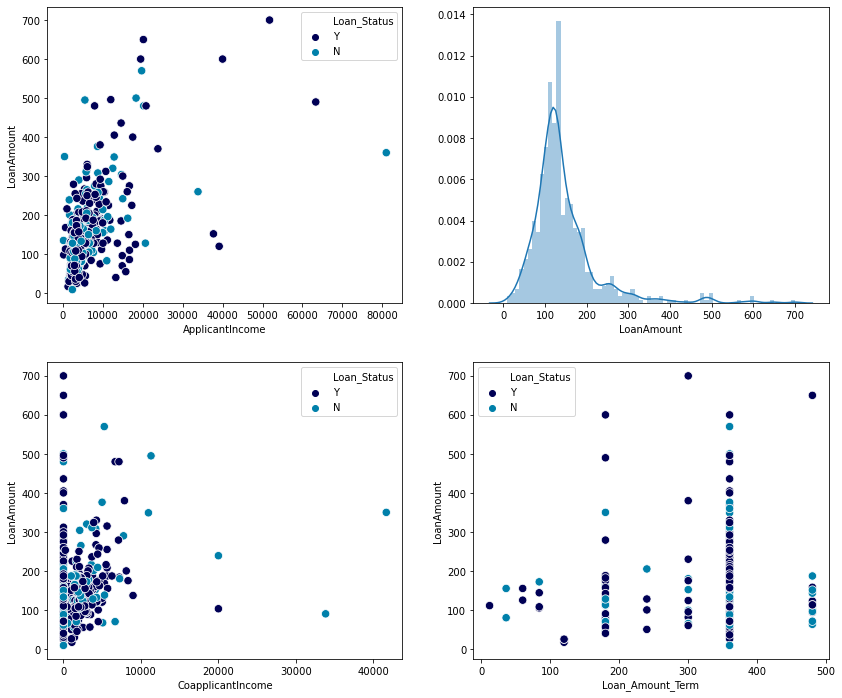

In [50]:
fig,ax = plt.subplots(2,2, figsize=(14,12))

sns.scatterplot(data=loan_train,x="ApplicantIncome",y="LoanAmount",s=70,hue="Loan_Status",palette='ocean',ax=ax[0,0])
sns.distplot(loan_train['LoanAmount'],bins=70,ax=ax[0,1])
sns.scatterplot(data=loan_train,x="CoapplicantIncome",y="LoanAmount",s=70,hue="Loan_Status",palette='ocean',ax=ax[1,0])
sns.scatterplot(data=loan_train,x="Loan_Amount_Term",y="LoanAmount",s=70,hue="Loan_Status",palette='ocean',ax=ax[1,1])

plt.show()

In [51]:
loan_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.020183
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.009391
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.018454
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.022967
Credit_History,-0.020183,0.009391,-0.018454,-0.022967,1.000000


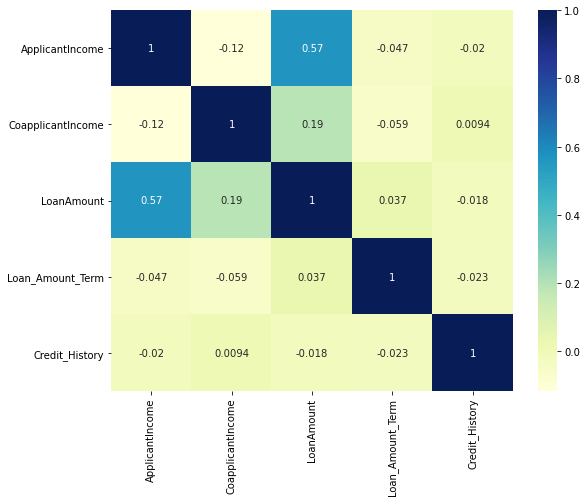

In [52]:
fig,ax = plt.subplots(figsize=(9,7))
correlations = loan_train.corr()
sns.heatmap(correlations,cmap="YlGnBu",annot=True)
plt.show()

In [53]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
objectlist_train = loan_train.select_dtypes(include="object").columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for feature in objectlist_train:
    loan_train[feature]=le.fit_transform(loan_train[feature].astype(str))
print(loan_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB
None


In [58]:
objectlist_test = loan_test.select_dtypes(include="object").columns

for feature in objectlist_test:
    loan_test[feature]=le.fit_transform(loan_test[feature].astype(str))
print(loan_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int32  
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(7), int64(2)
memory usage: 24.5 KB
None


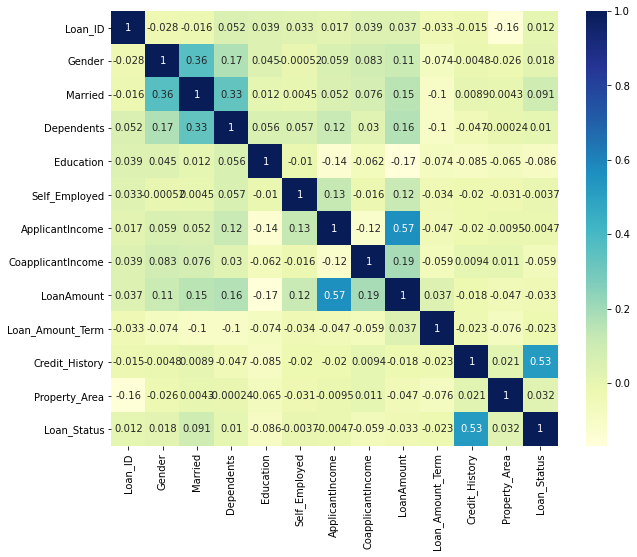

In [62]:
fig,ax = plt.subplots(figsize=(10,8))
correlations_ML = loan_train.corr()

sns.heatmap(correlations_ML,cmap="YlGnBu",annot=True)
plt.show()

In [64]:
x = loan_train.drop('Loan_Status',axis=1)
y = loan_train['Loan_Status']

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.30,random_state=0)

In [65]:
df_model = DecisionTreeClassifier()
df_model.fit(train_x,train_y)
predict_y = df_model.predict(test_x)
print(classification_report(test_y,predict_y))
print("Accuracy:",accuracy_score(predict_y,test_y))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        51
           1       0.84      0.80      0.82       134

    accuracy                           0.75       185
   macro avg       0.69      0.70      0.69       185
weighted avg       0.76      0.75      0.75       185

Accuracy: 0.745945945945946


In [66]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x,train_y)
predict_y2 = rf_model.predict(test_x)
print(classification_report(test_y,predict_y2))
print("Accuracy:",accuracy_score(predict_y2,test_y))

              precision    recall  f1-score   support

           0       0.74      0.51      0.60        51
           1       0.83      0.93      0.88       134

    accuracy                           0.82       185
   macro avg       0.79      0.72      0.74       185
weighted avg       0.81      0.82      0.80       185

Accuracy: 0.8162162162162162


In [69]:
lr_model = LogisticRegression(solver='lbfgs',max_iter=100,multi_class='auto')
lr_model.fit(train_x,train_y)
predict_y3 = lr_model.predict(test_x)
print(classification_report(test_y,predict_y3))
print("Accuracy:",accuracy_score(predict_y3,test_y))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        51
           1       0.81      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.68      0.70       185
weighted avg       0.78      0.79      0.78       185

Accuracy: 0.7945945945945946


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
